Decision Tree

Tiatnic Survival Dataset

In [112]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [5]:
#Load the data sets- train 
df = pd.read_csv("train.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Look at top values of train data 
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Print the column names of train data
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [13]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

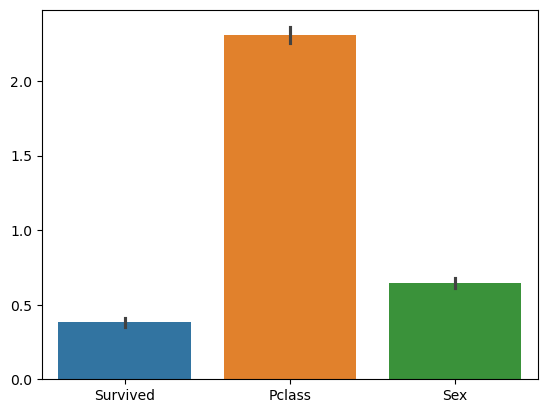

In [162]:
#Barchart of Survived, Pclass, Sex, Embarked
feature = df[['Survived','Pclass','Sex','Embarked']]
sns.barplot(feature)
plt.show()

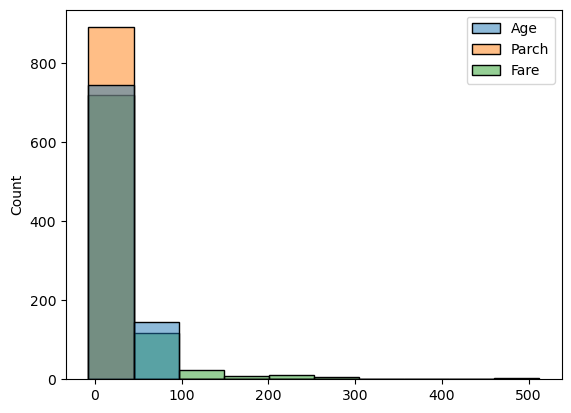

In [169]:
#Histogram of Age, Parch, Fare
hist = df[['Age','Parch','Fare']]
sns.histplot(hist,kde = False,bins = 10)
plt.show()

In [11]:
#Plot histogram of age for survived and did not survived class


In [12]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers

In [13]:
#Histogram of Age of the given data set(sample)

## Handling Missing Values

In [30]:
#Replace the msiing values in Embarked column by 'S'
df['Embarked'] = df['Embarked'].replace(np.NaN,'S')

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
#Impute the missing values in Fare column with median value


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [40]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
age_mean = df['Age'].mean()
age_std = df['Age'].std()
number_of_missing = df['Age'].isnull().sum()
generated_random_values = np.random.normal(age_mean,age_std,number_of_missing)
df.loc[df['Age'].isnull(),'Age'] = generated_random_values
df['Age'].isnull().sum()

0

## Feature Engineering - Creating new features

In [43]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] +1
df[['SibSp','Parch','FamilySize']]

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,1,2,4
889,0,0,1


In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32.407059,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [47]:
# Create new feature IsAlone from FamilySize If FamilySize == 1 then IsAlone = True else IsAlone = False
df['IsAlone']= df['FamilySize']==1
df[['IsAlone','FamilySize']]

,IsAlone,FamilySize
0,False,2
1,False,2
2,True,1
3,False,2
4,True,1
...,...,...
886,True,1
887,True,1
888,False,4
889,True,1


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [60]:
df['Has_cabin'] = df['Cabin'].notna()

In [61]:
df[['Has_cabin','Cabin']]

,Has_cabin,Cabin
0,False,NaN
1,True,C85
2,False,NaN
3,True,C123
4,False,NaN
...,...,...
886,False,NaN
887,True,B42
888,False,NaN
889,True,C148


In [68]:
#Drop the columns which may not be useful in prediction of survival,Drop PassengerId, Name, Ticket, and Cabin
df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace = True)

In [69]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22.000000,1,0,7.2500,S,2,False,False
1,1,1,female,38.000000,1,0,71.2833,C,2,False,True
2,1,3,female,26.000000,0,0,7.9250,S,1,True,False
3,1,1,female,35.000000,1,0,53.1000,S,2,False,True
4,0,3,male,35.000000,0,0,8.0500,S,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,True,False
887,1,1,female,19.000000,0,0,30.0000,S,1,True,True
888,0,3,female,32.407059,1,2,23.4500,S,4,False,False
889,1,1,male,26.000000,0,0,30.0000,C,1,True,True


## Model Building

In [104]:
#Prepare X and y
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
y = df['Survived']
x = df.drop(columns=['Survived','SibSp','Parch','Embarked'])
print(y.head())
print(x.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass  Sex   Age     Fare  FamilySize  IsAlone  Has_cabin
0       3    1  22.0   7.2500           2    False      False
1       1    0  38.0  71.2833           2    False       True
2       3    0  26.0   7.9250           1     True      False
3       1    0  35.0  53.1000           2    False       True
4       3    1  35.0   8.0500           1     True      False


In [84]:
# Label encoding of categorical features

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])



In [86]:
df.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
FamilySize      int64
IsAlone          bool
Has_cabin        bool
dtype: object

In [ ]:
# concat df_categorical with original df


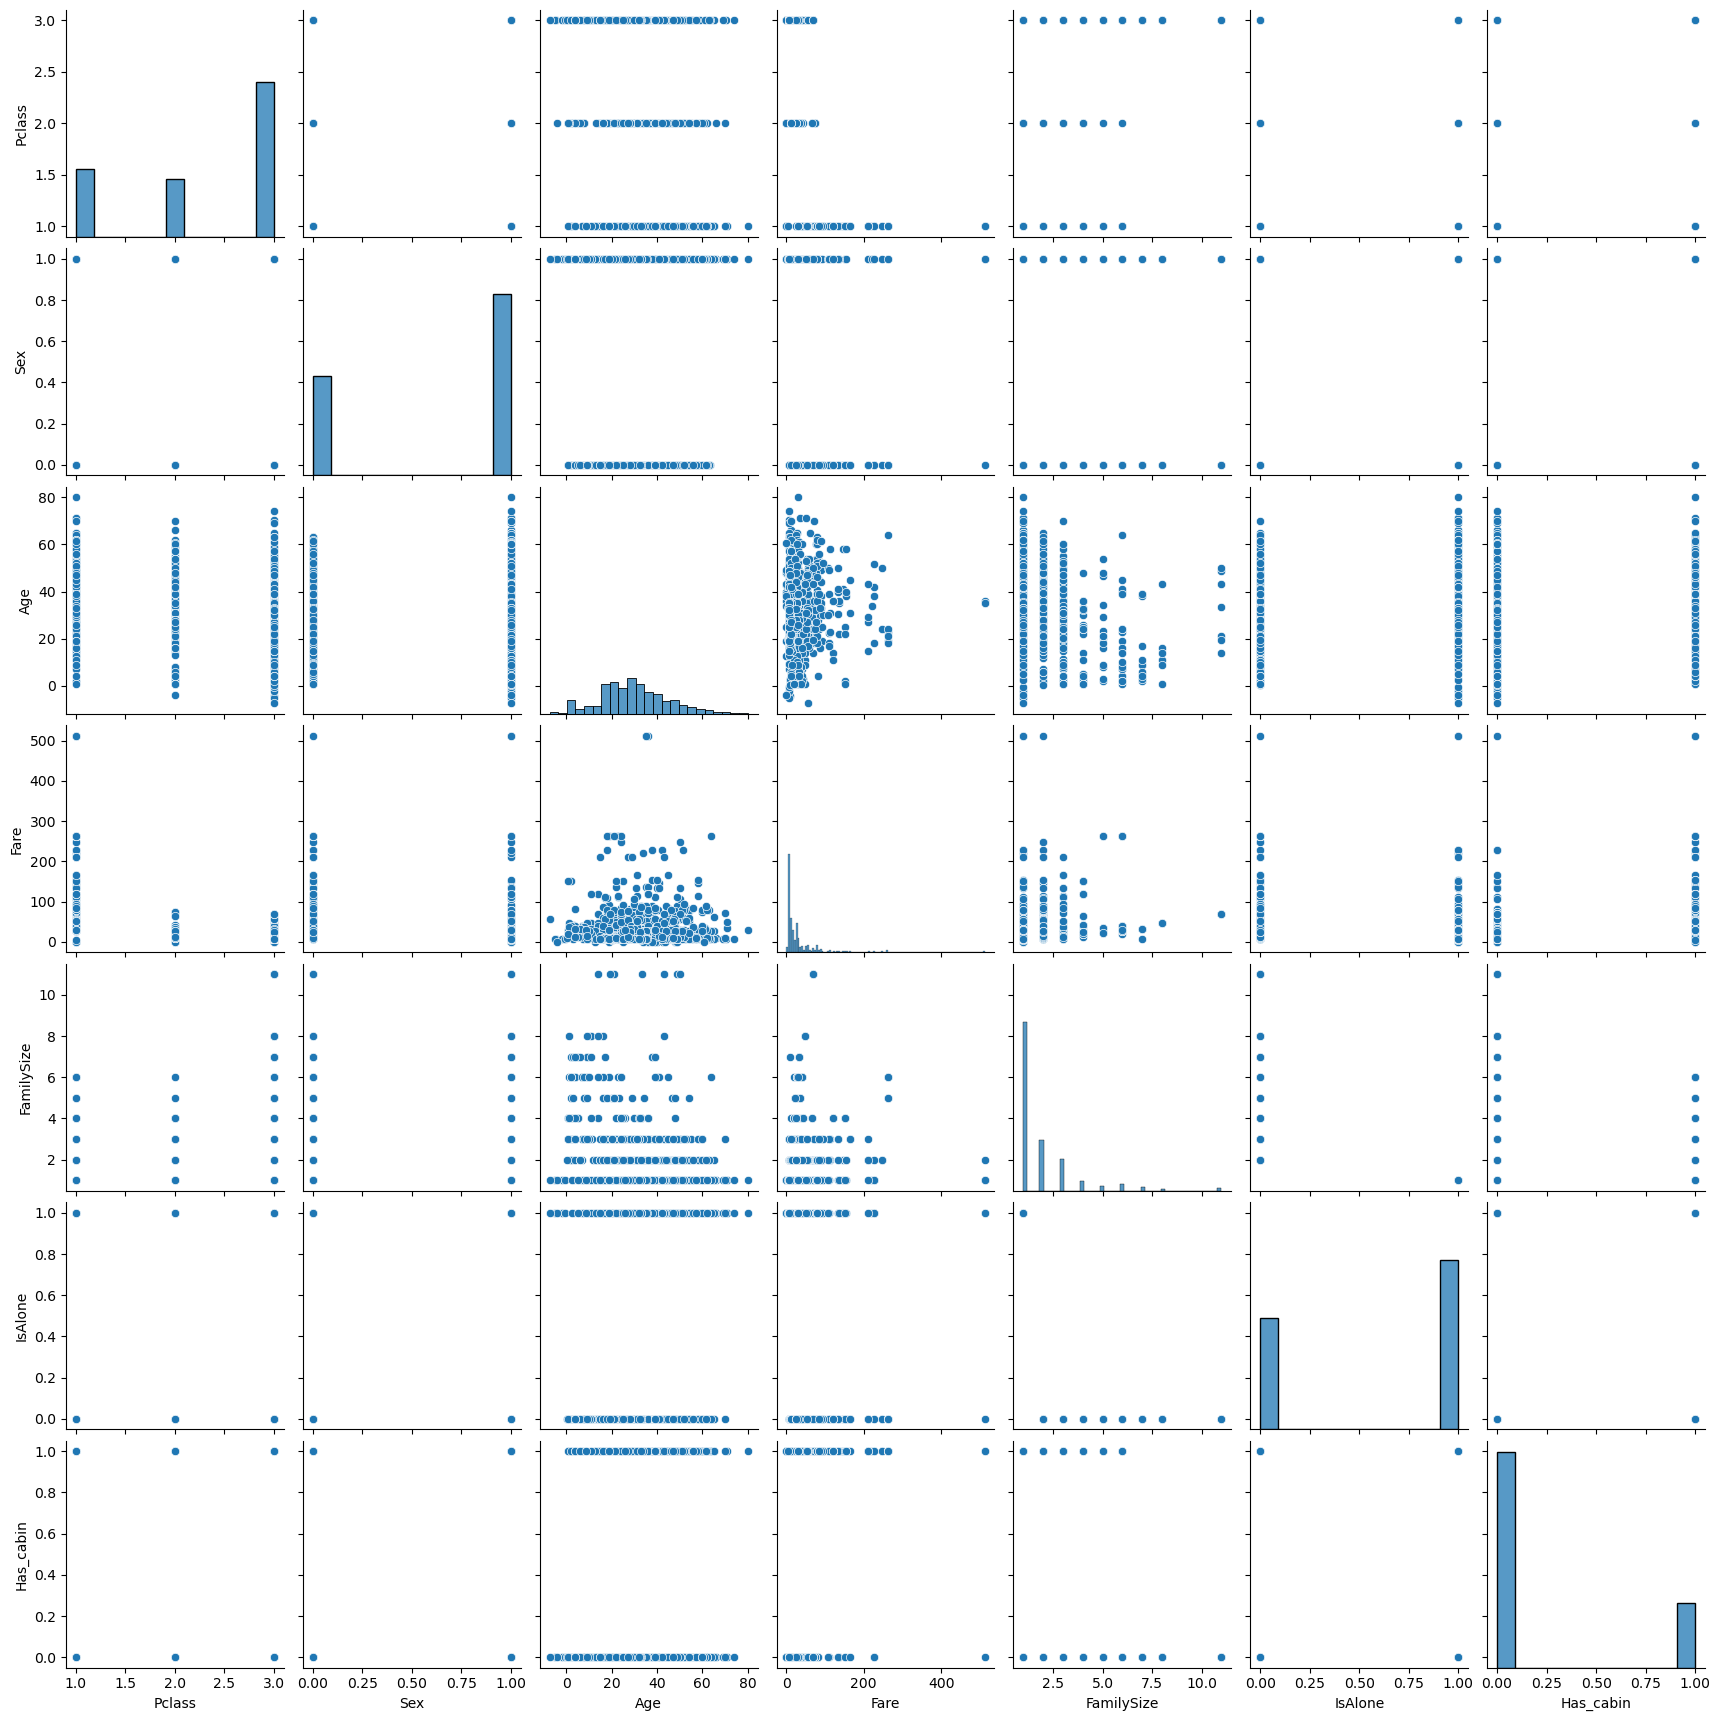

In [89]:
#Do a pairplot of all features
features = df[['Pclass','Sex','Age','Fare','FamilySize','IsAlone','Has_cabin']]
sns.pairplot(features)
plt.show()

In [110]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1)


In [109]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

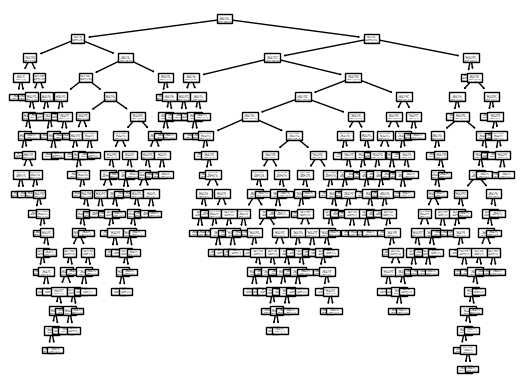

In [129]:
#Print the tree

# Importing required packages for visualization
plot_tree(model,class_names=['not survived','survived'])
plt.show()


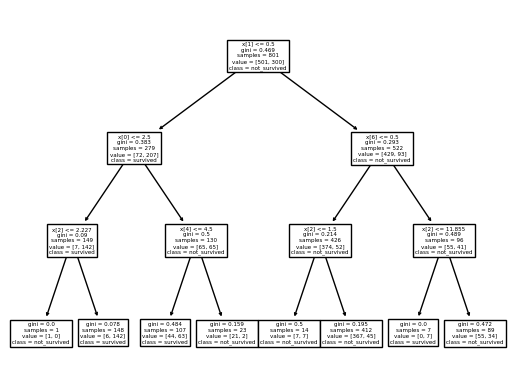

In [137]:
# plotting tree with max_depth=3
model = DecisionTreeClassifier(max_depth =3)
model.fit(X_train,Y_train)
plot_tree(model,class_names=['not_survived','survived'])
plt.show()

<img src="tree2.png">

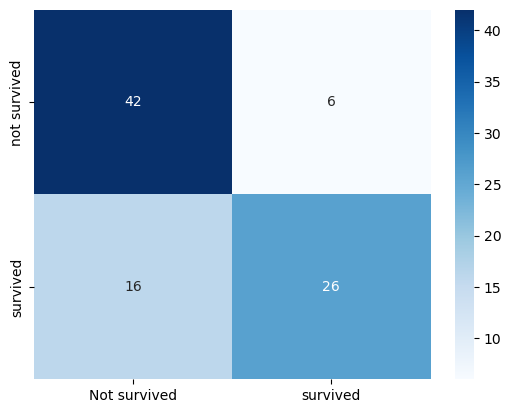

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        48
           1       0.81      0.62      0.70        42

    accuracy                           0.76        90
   macro avg       0.77      0.75      0.75        90
weighted avg       0.77      0.76      0.75        90



In [157]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model' is already trained and the data is split into training and testing sets

# Make predictions on the validation (test) set
Y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(confusion_matrix,xticklabels = ['Not survived','survived'],annot=True,cmap = "Blues",yticklabels = ['not survived','survived'])
plt.show()


# Calculate and print accuracy, precision, recall, and F1 score
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))

In [159]:
# Printing confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the validation (test) set
Y_pred = model.predict(X_test)

# Calculate and print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[42  6]
 [16 26]]
Accuracy: 0.76
